# Simple Linear Regression


Estimated time needed: **15-30** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

In case you're working **locally** uncomment the below line. 


In [ ]:
#!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [3]:
# Importing Needed Packages

! pip install matplotlib pandas numpy

# Importing Needed Packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import urllib.request
import os

# Downloading the Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
file_name = "FuelConsumption.csv"

# Download only if not already present
if not os.path.exists(file_name):
    urllib.request.urlretrieve(url, file_name)
    print("✅ Download completed successfully!")
else:
    print("✅ File already exists, skipping download.")

# Understanding the Data
"""
FuelConsumption.csv:
This dataset contains model-specific fuel consumption ratings and estimated CO2 emissions
for new light-duty vehicles for retail sale in Canada.

Features:
- MODELYEAR: e.g. 2014
- MAKE: e.g. Acura
- MODEL: e.g. ILX
- VEHICLE CLASS: e.g. SUV
- ENGINE SIZE (L): e.g. 4.7
- CYLINDERS: e.g. 6
- TRANSMISSION: e.g. A6
- FUEL CONSUMPTION in CITY (L/100 km): e.g. 9.9
- FUEL CONSUMPTION in HWY (L/100 km): e.g. 8.9
- FUEL CONSUMPTION COMB (L/100 km): e.g. 9.2
- CO2 EMISSIONS (g/km): e.g. 182 --> low --> 0
"""

# Reading the Data
df = pd.read_csv(file_name)

# Display first few rows
print("\n📄 Dataset preview:")
print(df.head())

# Optional: show basic info
print("\n📊 Dataset Info:")
print(df.info())

# Optional: show basic stats
print("\n📈 Summary Statistics:")
print(df.describe())


✅ Download completed successfully!

📄 Dataset preview:
   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5        

### Data Exploration
Let's first have a descriptive exploration on our data.


In [6]:
### Data Exploration
# Let's first have a descriptive exploration on our data.

print("📄 First 5 rows:\n", df.head(), 
      "\n📊 Shape:", df.shape, 
      "\n🧾 Columns:\n", df.columns.tolist(), 
      "\n❓ Missing values:\n", df.isnull().sum(), 
      "\n🔢 Data types:\n", df.dtypes, 
      "\n📈 Summary:\n", df.describe(), 
      "\n🏷️ Unique values:\n", {col: df[col].nunique() for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION'] if col in df.columns}, 
      "\n📊 Correlation:\n", df.corr(numeric_only=True))


📄 First 5 rows:
    MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1  

Let's select some features to explore more.


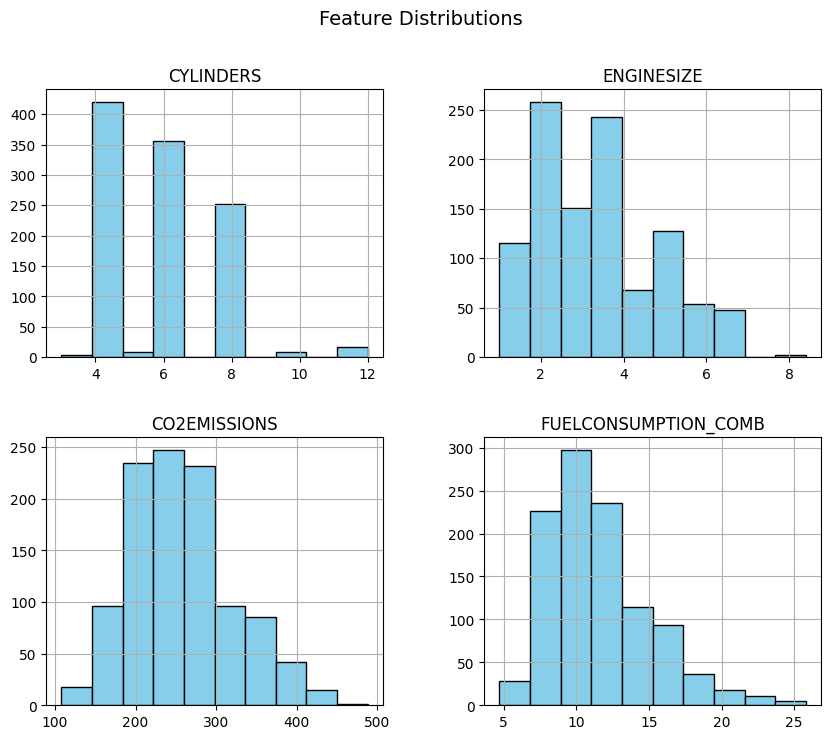

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

### Feature Selection and Visualization
import matplotlib.pyplot as plt

# Select important features
viz = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

# Plot histograms for each selected feature
viz.hist(figsize=(10,8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


We can plot each of these features:


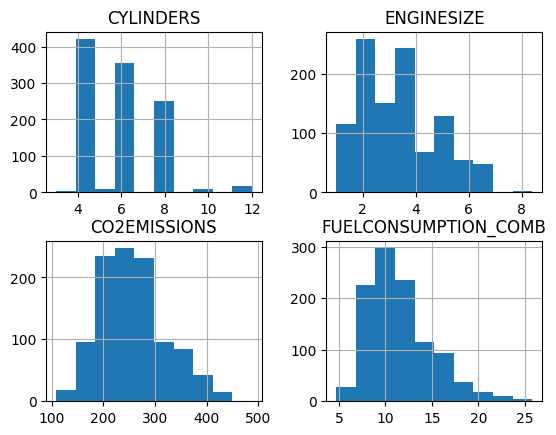

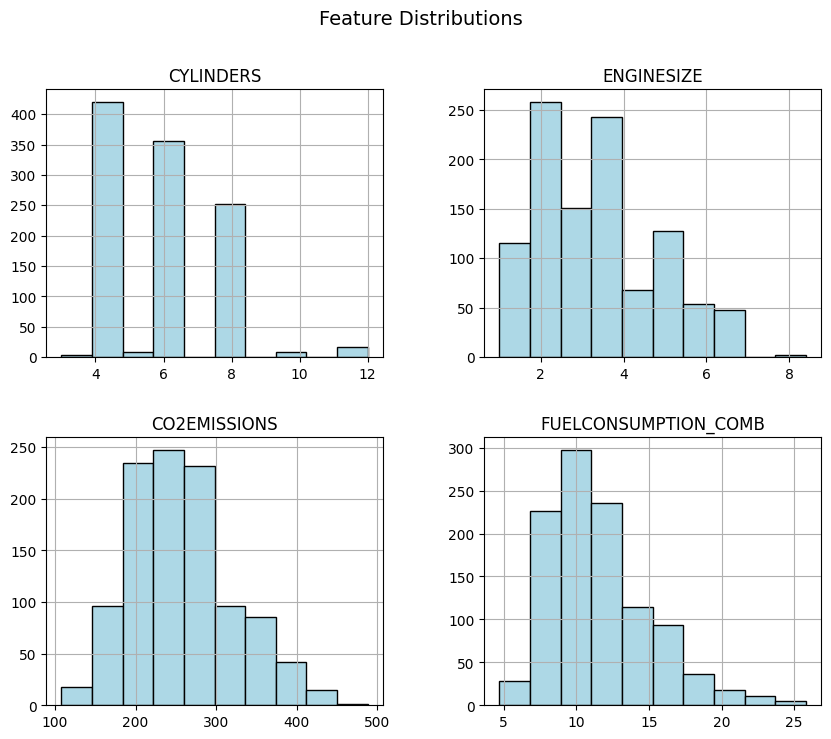

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

viz = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist(figsize=(10,8), color='lightblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


Now, let's plot each of these features against the Emission, to see how linear their relationship is:


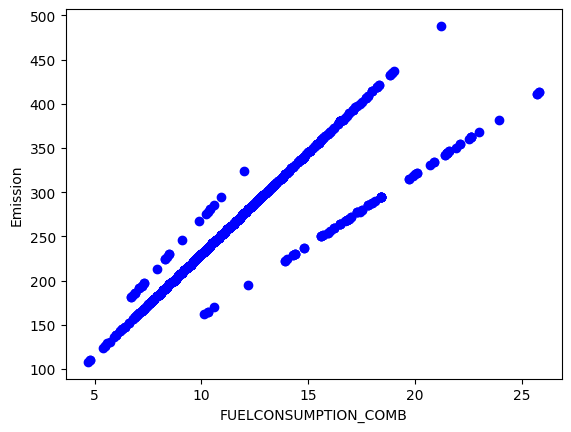

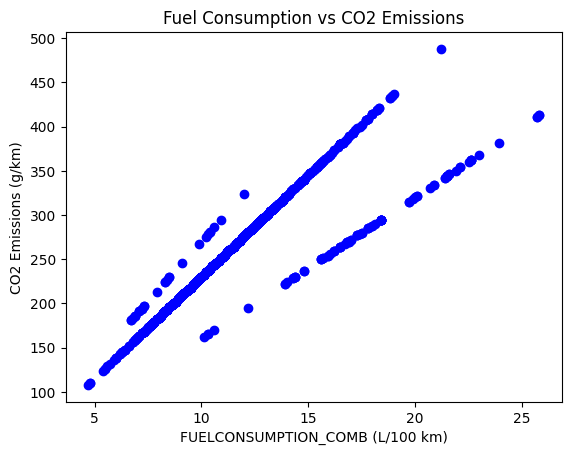

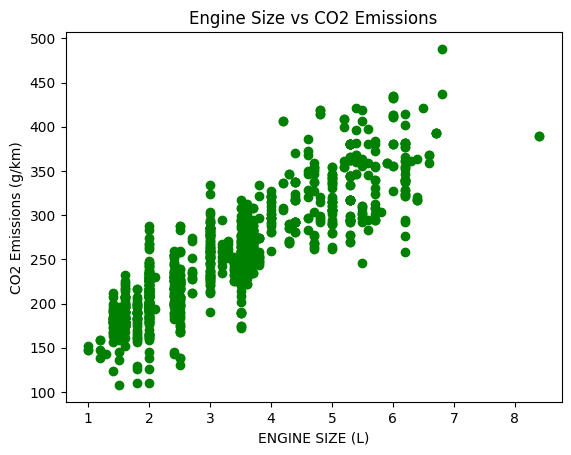

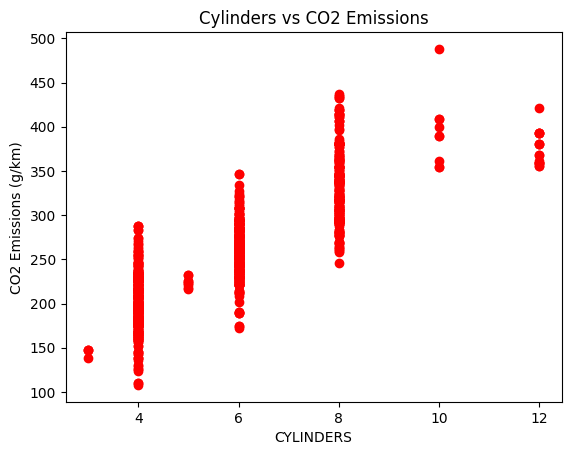

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show() 

### Plot each feature against CO2 Emissions

import matplotlib.pyplot as plt

# Fuel Consumption vs CO2
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Fuel Consumption vs CO2 Emissions")
plt.show()

# Engine Size vs CO2
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='green')
plt.xlabel("ENGINE SIZE (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Engine Size vs CO2 Emissions")
plt.show()

# Cylinders vs CO2
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Cylinders vs CO2 Emissions")
plt.show()


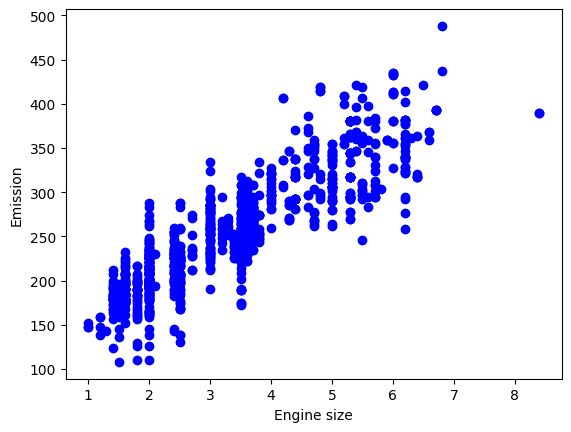

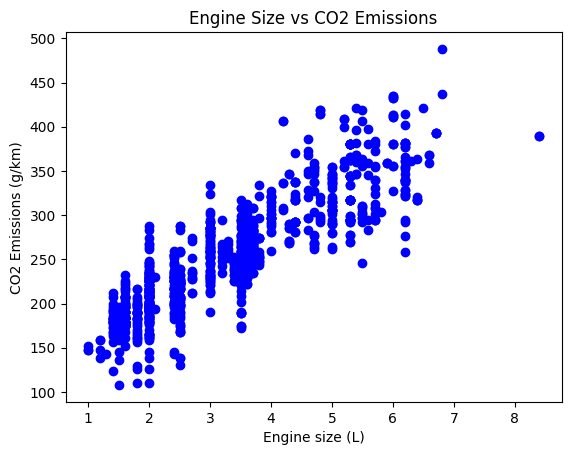

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

import matplotlib.pyplot as plt

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Engine Size vs CO2 Emissions")
plt.show()


## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


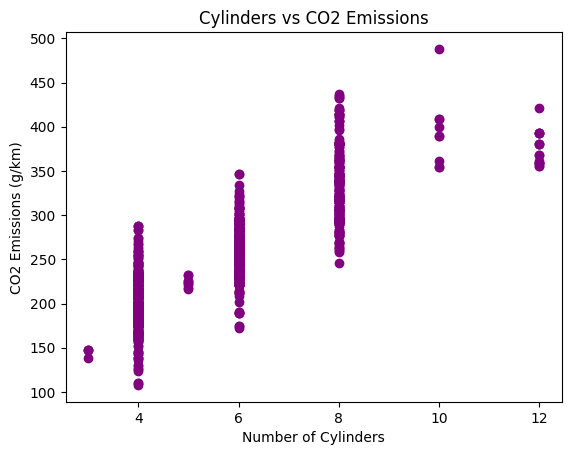

In [11]:
# write your code here

## Practice
# Plot CYLINDERS vs CO2EMISSIONS to see their relationship

import matplotlib.pyplot as plt

plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='purple')
plt.xlabel("Number of Cylinders")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Cylinders vs CO2 Emissions")
plt.show()





<details><summary>Click here for the solution</summary>

```python    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 


In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Creating train and test dataset

import numpy as np

# Create a random mask for 80/20 split
msk = np.random.rand(len(df)) < 0.8

# Split the dataset
train = df[msk]
test = df[~msk]

# Display the sizes of each split
print("Training set:", train.shape)
print("Testing set:", test.shape)

# Quick preview
print("\n📄 Training set preview:")
print(train.head())

print("\n📄 Testing set preview:")
print(test.head())


Training set: (847, 13)
Testing set: (220, 13)

📄 Training set preview:
   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0             

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 


#### Train data distribution


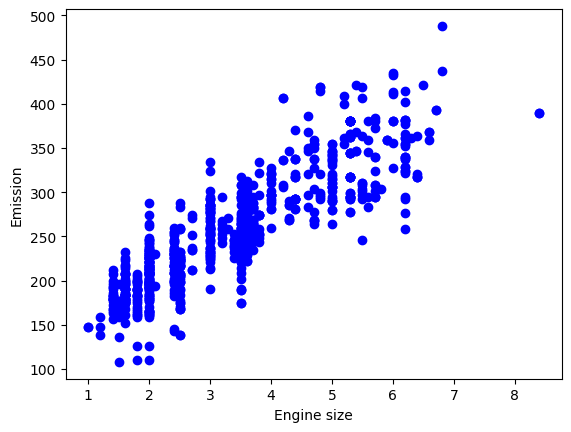

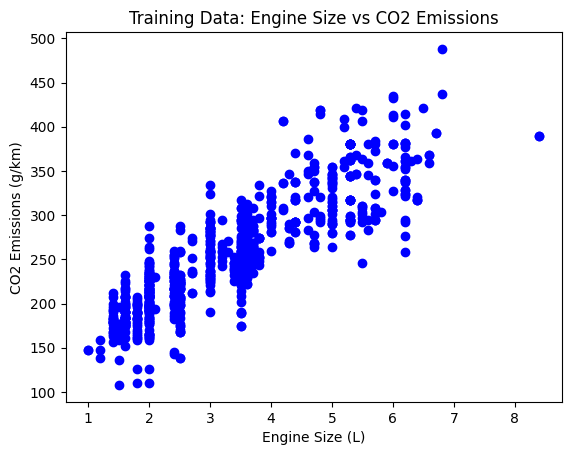

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


### Simple Regression Model
# Visualize the training data distribution

import matplotlib.pyplot as plt

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Training Data: Engine Size vs CO2 Emissions")
plt.show()

from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)



#### Modeling
Using sklearn package to model data.


In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

#### Modeling
# Using sklearn to fit a simple linear regression model

from sklearn import linear_model
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Prepare training data
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Train the model
regr.fit(train_x, train_y)

# Print coefficients
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)


Coefficients:  [[38.6829258]]
Intercept:  [126.79013215]
Coefficients: [[38.6829258]]
Intercept: [126.79013215]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


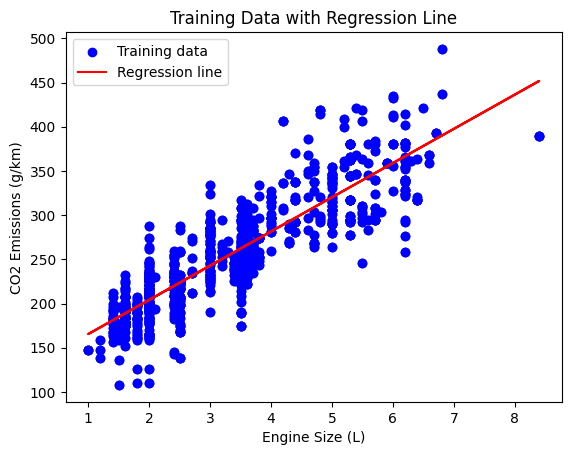

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Visualizing the Regression Line on Training Data

import matplotlib.pyplot as plt

# Scatter plot of training data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', label='Training data')

# Plot regression line: y = a*x + b
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label='Regression line')

# Add labels and legend
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Training Data with Regression Line")
plt.legend()
plt.show()


#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

#### Evaluation
# Compare actual vs predicted values to evaluate model accuracy

from sklearn.metrics import r2_score
import numpy as np

# Prepare test data
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Predict CO2 emissions using the trained model
test_y_ = regr.predict(test_x)

# Calculate metrics
mae = np.mean(np.absolute(test_y_ - test_y))                     # Mean Absolute Error
mse = np.mean((test_y_ - test_y) ** 2)                          # Mean Squared Error
r2 = r2_score(test_y, test_y_)                                   # R-squared Score

# Print results
print("Mean Absolute Error (MAE): %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("R2-score: %.2f" % r2)


Mean absolute error: 23.85
Residual sum of squares (MSE): 973.75
R2-score: 0.77
Mean Absolute Error (MAE): 23.85
Residual sum of squares (MSE): 973.75
R2-score: 0.77


## Exercise


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [27]:


# Select FUELCONSUMPTION_COMB as the feature for training and testing

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])  # Training feature
train_y = np.asanyarray(train[['CO2EMISSIONS']])           # Target variable

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])     # Testing feature
test_y = np.asanyarray(test[['CO2EMISSIONS']])             # Target variable

from sklearn import linear_model
from sklearn.metrics import r2_score

# Train model
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# Predict
test_y_ = regr.predict(test_x)

# Evaluate model performance
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))



Mean Absolute Error: 19.49
Residual sum of squares (MSE): 765.41
R2-score: 0.82


<details><summary>Click here for the solution</summary>

```python    
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

```

</details>


Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [29]:
regr = linear_model.LinearRegression()

#ADD CODE

from sklearn import linear_model

# Create Linear Regression model
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(train_x, train_y)

print("Coefficient:", regr.coef_)
print("Intercept:", regr.intercept_)




Coefficient: [[16.23567161]]
Intercept: [68.13457056]


<details><summary>Click here for the solution</summary>

```python    
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

```

</details>


Find the predictions using the model's `predict` function and the `test_x` data


In [31]:
predictions = regr.predict(test_x)
print(predictions[:5])

[[232.11485382]
 [248.35052543]
 [217.50274937]
 [236.98555531]
 [219.12631654]]


<details><summary>Click here for the solution</summary>

```python    
predictions = regr.predict(test_x)

```

</details>


Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [34]:
#ADD CODE

mae = np.mean(np.absolute(predictions - test_y))
print("Mean Absolute Error: %.2f" % mae)



Mean Absolute Error: 19.49


<details><summary>Click here for the solution</summary>

```python    
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

```

</details>


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`


### Repeat everything you did using two additional regression models [optional]

### Thank you for completing the lab!